<a href="https://colab.research.google.com/github/MOISECHRIST/Machine-Learning/blob/main/CIFAR10_Pytorch_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [22]:
# CIFAR10 : moyenne et écart type
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

# Définir la transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Charger et normaliser les jeux de données d'entraînement et de test CIFAR10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
# Définir le modèle
model = nn.Sequential()
model.add_module("dense1", nn.Linear(32*32*3, 128))  # Les images CIFAR10 sont de 32x32x3
model.add_module("act1", nn.ReLU())
model.add_module("dense2", nn.Linear(128, 10))
model.add_module("act2", nn.ReLU())
model.add_module("output", nn.Linear(10, 10))

# Définir la fonction de perte et l'optimiseur
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0005)

In [24]:
# Définir une fonction pour entraîner le modèle
def training_model(n_epochs, batch_size, model, optimizer, loss_fn, trainset):
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    loss_train = list()
    accuracy = list()
    for epoch in range(n_epochs):
        for i, data in enumerate(trainloader, 0):
            # obtenir les entrées ; data est une liste de [inputs, labels]
            inputs, labels = data

            # Aplatir les entrées
            inputs = inputs.view(inputs.shape[0], -1)

            # Passe avant : calculer y prévu en passant x au modèle
            y_pred = model(inputs)

            # Calculer la perte
            loss = loss_fn(y_pred, labels)

            # Avant la passe arrière, utiliser l'objet optimiseur pour mettre à zéro tous les
            # gradients pour les variables qu'il mettra à jour (qui sont les poids
            # apprenables du modèle)
            optimizer.zero_grad()

            # Passe arrière : calculer le gradient de la perte par rapport aux paramètres du modèle
            loss.backward()

            # Appeler la fonction step sur un Optimizer fait une mise à jour de ses paramètres
            optimizer.step()

        loss_train.append(loss.item())
        accuracy.append((y_pred.argmax(dim=1) == labels).float().mean().item())
        print(f'Finished epoch {epoch}, latest loss {loss.item()}')
    print("Training completed.")
    return (loss_train, accuracy)

In [25]:
# Entraîner le modèle
n_epochs = 21
batch_size = 100
loss_train, accuracy = training_model(n_epochs, batch_size, model, optimizer, loss_fn, trainset)

Finished epoch 0, latest loss 1.6353474855422974
Finished epoch 1, latest loss 1.352439284324646
Finished epoch 2, latest loss 1.4085899591445923
Finished epoch 3, latest loss 1.366963505744934
Finished epoch 4, latest loss 1.2680630683898926
Finished epoch 5, latest loss 1.2100589275360107
Finished epoch 6, latest loss 1.2037363052368164
Finished epoch 7, latest loss 1.1716252565383911
Finished epoch 8, latest loss 1.109519600868225
Finished epoch 9, latest loss 1.1505225896835327
Finished epoch 10, latest loss 1.1218540668487549
Finished epoch 11, latest loss 1.027698278427124
Finished epoch 12, latest loss 0.9588505029678345
Finished epoch 13, latest loss 1.2684102058410645
Finished epoch 14, latest loss 1.1360725164413452
Finished epoch 15, latest loss 1.0457696914672852
Finished epoch 16, latest loss 0.905208945274353
Finished epoch 17, latest loss 0.9563413858413696
Finished epoch 18, latest loss 1.0510097742080688
Finished epoch 19, latest loss 0.9281929731369019
Finished epoch 

In [26]:
import matplotlib.pyplot as plt
import matplotlib

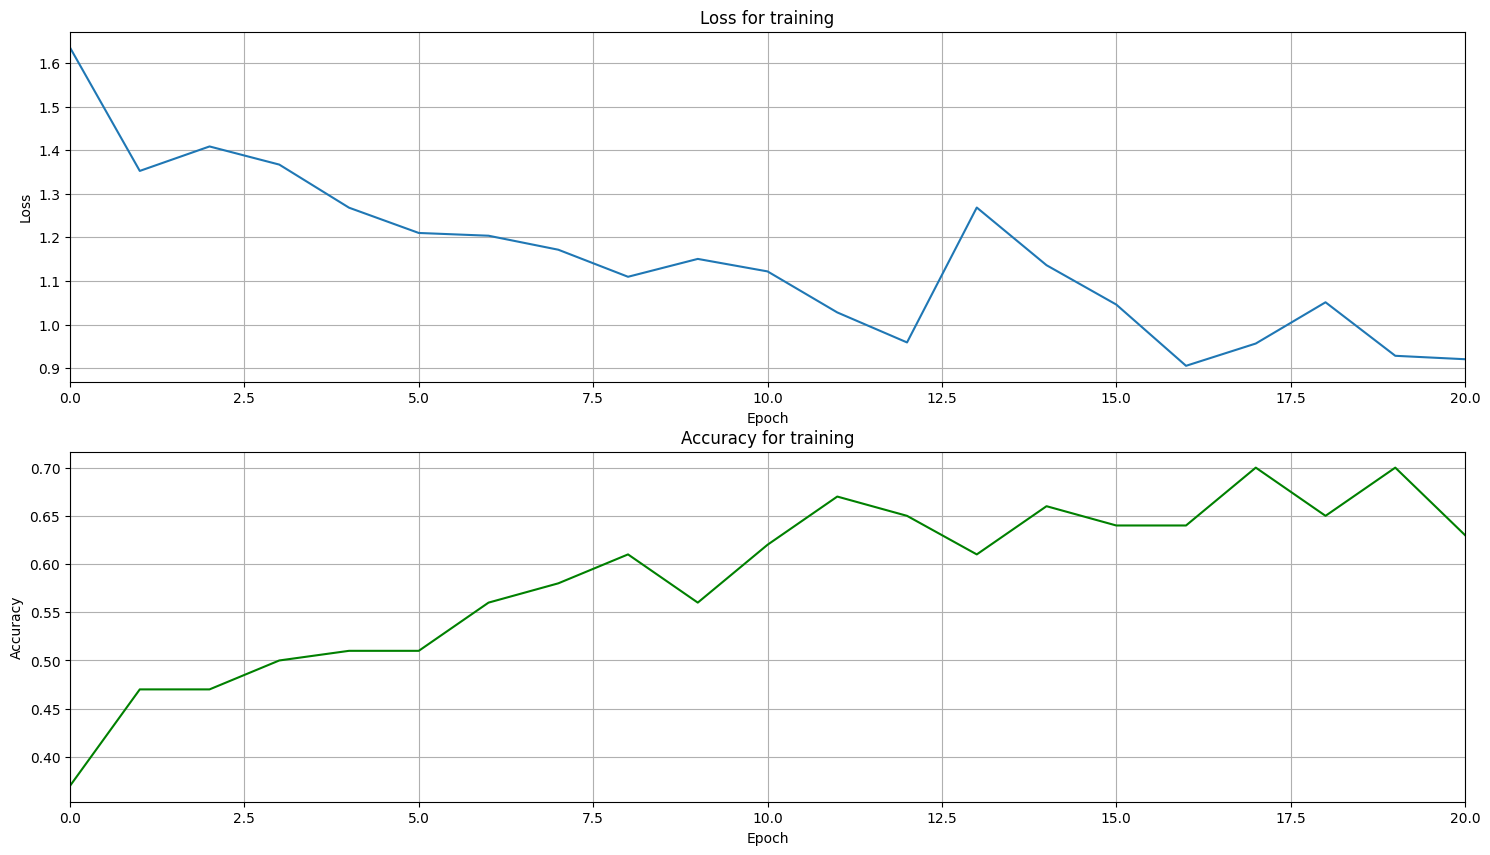

In [27]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
plt.plot(loss_train)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim([0,n_epochs-1])
plt.title('Loss for training')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(accuracy, c='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim([0,n_epochs-1])
plt.title('Accuracy for training')
plt.grid(True)
plt.show()
plt.close()

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Définir une fonction pour évaluer le modèle
def evaluate_model(model, testset):
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
    correct = 0
    total = 0
    all_predicted = []
    all_labels = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # Aplatir les images
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_predicted.extend(predicted.numpy())
            all_labels.extend(labels.numpy())
    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))
    return all_predicted, all_labels

# Évaluer le modèle
all_predicted, all_labels = evaluate_model(model, testset)

# Imprimer la matrice de confusion
cm=confusion_matrix(all_labels, all_predicted)

Accuracy of the network on the test images: 50 %


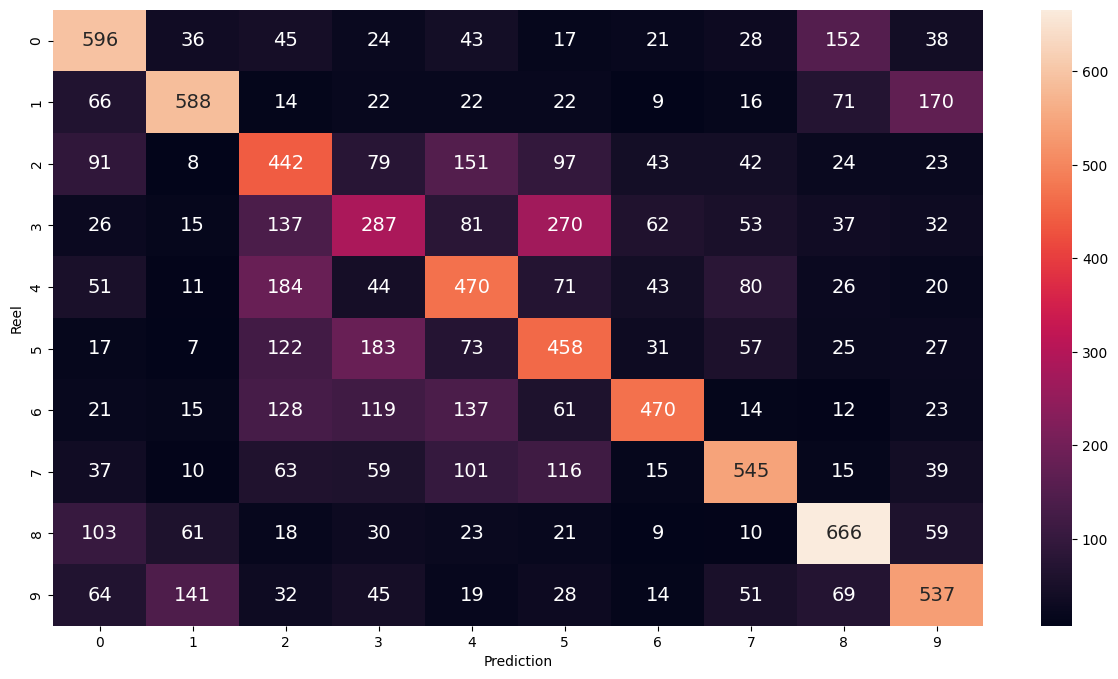

In [29]:
import seaborn as sns
plt.figure(figsize=[15, 8])
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Prediction')
plt.ylabel('Reel')
plt.show()